# Imports

In [1]:

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import gstools as gs

# turn of warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Now fit the prior
from scipy.io import loadmat


P=loadmat('data/BHRS_prior.mat')
print(type(P))
print(P.keys())
print(type(P["prior_0"]))
print(P["prior_0"].shape)
print(P["x"].shape)
print(P["y"].shape)




<class 'dict'>
dict_keys(['__header__', '__version__', '__globals__', 'x', 'y', 'prior_0', 'prior_1', 'prior_2'])
<class 'numpy.ndarray'>
(321, 321)
(1, 321)
(1, 321)


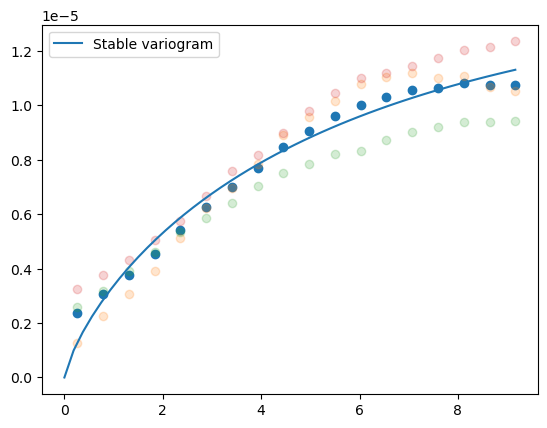

In [5]:
bin_center_0, gamma_0 = gs.vario_estimate((P["x"], P["y"]), P["prior_0"])
bin_center_1, gamma_1 = gs.vario_estimate((P["x"], P["y"]), P["prior_1"])
bin_center_2, gamma_2 = gs.vario_estimate((P["x"], P["y"]), P["prior_2"])

# Combigning the variance. The Gamma values can be averaged (like 3 scaled histograms). It helps especially with the larger distances where there are fewer available points
gamma_all = np.average(np.array([gamma_0, gamma_1, gamma_2]), axis=0)
fit_model = gs.Stable(dim=2)
fit_model.fit_variogram(bin_center_0, gamma_all, nugget=False)

ax = fit_model.plot(x_max=max(bin_center_0))

ax.scatter(bin_center_0, gamma_all, label='Combined')
ax.scatter(bin_center_0, gamma_0, alpha=0.2, label='Combined')
ax.scatter(bin_center_1, gamma_1, alpha=0.2, label='Combined')
ax.scatter(bin_center_2, gamma_2, alpha=0.2, label='Combined')

In [8]:
mean = np.mean([P["prior_0"], P["prior_1"], P["prior_2"]])
print(f"mean = {mean}")

mean = 0.08494846202002478


In [16]:
# code from the starting notebook, that creates a prior realization
im = 0
prior = [{}]
prior[im]['name'] = 'Cholesky, velocity (m/ns)'
prior[im]['method'] = 'cholesky'

prior[im]['x'] = P["x"]
prior[im]['y'] = P["y"]
domain_shape = (len(prior[im]['y']), len(prior[im]['x']))  # for reshaping later

# Set properties of prior: !dummy values, you need to find the correct values based on the training images!
mean0=mean
h=1.5
var=1e-05

prior[im]['m0'] = mean0
prior[im]['Cm'] = '{} Sph({})'.format(var, h)

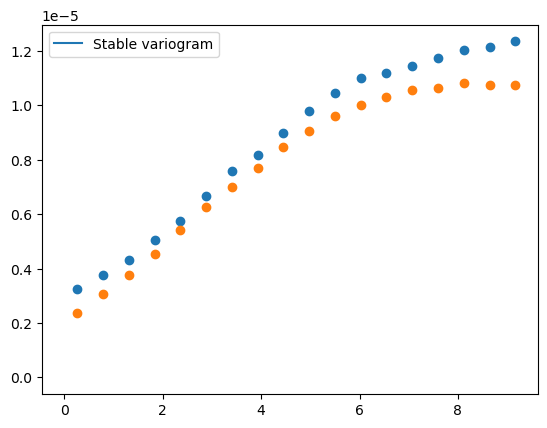

In [17]:
bin_center_ours, gamma_ours = gs.vario_estimate((P["x"], P["y"]), P["prior_2"])

fit_model = gs.Stable(dim=2)
fit_model.fit_variogram(bin_center_ours, gamma_ours, nugget=False)

ax = fit_model.plot(x_max=max(gamma_ours))

ax.scatter(bin_center_ours, gamma_ours, label='Our')
ax.scatter(bin_center_0, gamma_all, label='Combined')